# <font color='purple'>Train file 

## importing the libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## creat a sries

In [5]:
a = [ "a" , "b" , "c"]
series = pd.Series( a , index =[0 , 1  , 2])
print(series)

0    a
1    b
2    c
dtype: object


## creat data frame 

In [6]:
test_dataset = {
    'name' : ["Saleh" , "Pasha" , "Mehran"] ,
    'Age':[19 , 18 , 19] ,
    'Gender' : ["male" , "nmale " , "male"]
}
dataFrame = pd.DataFrame(test_dataset , index=['A' , 'B' , 'C'])
print(dataFrame)

     name  Age  Gender
A   Saleh   19    male
B   Pasha   18  nmale 
C  Mehran   19    male


In [7]:
# show a specific row by loc (locate) .
print(dataFrame.loc[['A' , 'B']])
print("***************")
print(dataFrame.loc['A'])
print("***************")
print(dataFrame.loc['A' ,'Age'])
print("***************")

# show the maximum number of rows that my system can showed
print("The maximum number of rows that can show is :" , pd.options.display.max_rows)
# change the maximum rows number : 
pd.options.display.max_rows = 90
print("The new maximum rows is : " , pd.options.display.max_rows)

    name  Age  Gender
A  Saleh   19    male
B  Pasha   18  nmale 
***************
name      Saleh
Age          19
Gender     male
Name: A, dtype: object
***************
19
***************
The maximum number of rows that can show is : 60
The new maximum rows is :  90


In [8]:
# head and tail :
# by head we can see the head of elements in data frame
# by tail we can see the tail of data frame
print(dataFrame.head(5))
print("\n**********************\n")
print(dataFrame.tail(2))

# info method is the object of data frame that return some information about data frame
print("**********************")
print(dataFrame.info())

     name  Age  Gender
A   Saleh   19    male
B   Pasha   18  nmale 
C  Mehran   19    male

**********************

     name  Age  Gender
B   Pasha   18  nmale 
C  Mehran   19    male
**********************
<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, A to C
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   Age     3 non-null      int64 
 2   Gender  3 non-null      object
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes
None


## read and print dataset

In [9]:
df = pd.read_csv('Data.csv')  # csv : comma separated values

features = df.iloc[ : , :  -1].values

target = df.iloc [ : , -1].values 


In [10]:
# show the head of dataaset 
print("The head of dataset : \n\n")
print(df.head(5), "\n\n")
# print features and target of dataset
print("the features is : \n\n " , features , "\n\n")
print("The target is : \n\n  " , target)

The head of dataset : 


   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes 


the features is : 

  [['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]] 


The target is : 

   ['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [11]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


## Data cleaning

### how many missing value do we have?

In [12]:
mis_show = df.isnull().sum()
print(mis_show)
# how many total cells do we have?
cell_count = np.product(df.shape)
print(cell_count)
# how many missing values do we have?
mis_count = mis_show.sum()
print(mis_count)
# the percent of missing values : 
print(100 * mis_count/cell_count)



Country      0
Age          1
Salary       1
Purchased    0
dtype: int64
40
2
5.0


### taking care of missing values

#### strategy 1

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = "mean")
# imputer.fit(features[:, 1:3])
# features[:, 1:3] = imputer.transform(features[:, 1:3])
features[:, 1:3] = imputer.fit_transform(features[:, 1:3])
print(features)


[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


#### strategy 2

##### dropna

In [14]:
# if we call the dropna : the nan rows is removing
print(df.dropna())
# df.dropna(inplace = True) --> this removing has be called by reference and the new df be replaced by previous
print("\n\n***********************")
# dropna a specific culomns 
print(df.dropna(subset = 'Age' , inplace = False))
# drop a specifics rows of the data frame by drop method
df.drop([0 , 1])

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
5   France  35.0  58000.0       Yes
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


***********************
   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


,Country,Age,Salary,Purchased
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


##### fillna

###### fill wherever

In [15]:
# we can call the filna , to fill the nan cells by : 
# 1 _ a specific value
# 2_ mean , mode , median 
# (1)
print(df.fillna(22 , inplace = False))

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0     22.0       Yes
5   France  35.0  58000.0       Yes
6    Spain  22.0  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [16]:
# (2)
mean = df['Age'].mean()
print("mean is :",  mean)
print(df.fillna(mean , inplace = False))
print("\n\n************************\n\n")

median = df['Age'].median()
print("the median is :" , median)
print(df.fillna(median , inplace = False))
print("\n\n************************\n\n")


mode = df['Age'].mode()[0] # the [0] means if we dont have mode , the minimum value of ages is place as mode . if we hade wrote[1] then , the second minimum value hade be placed as the mode .
print("The mode is : "  , mode)
print(df.fillna(mode , inplace = False))



mean is : 38.77777777777778
   Country        Age        Salary Purchased
0   France  44.000000  72000.000000        No
1    Spain  27.000000  48000.000000       Yes
2  Germany  30.000000  54000.000000        No
3    Spain  38.000000  61000.000000        No
4  Germany  40.000000     38.777778       Yes
5   France  35.000000  58000.000000       Yes
6    Spain  38.777778  52000.000000        No
7   France  48.000000  79000.000000       Yes
8  Germany  50.000000  83000.000000        No
9   France  37.000000  67000.000000       Yes


************************


the median is : 38.0
   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0     38.0       Yes
5   France  35.0  58000.0       Yes
6    Spain  38.0  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


******************

###### fill the specific columns 

In [17]:
mean = df['Salary'].mean()
print("The mean of the salaries is : " , mean)
print(df['Salary'].fillna(mean , inplace = False))


The mean of the salaries is :  63777.77777777778
0    72000.000000
1    48000.000000
2    54000.000000
3    61000.000000
4    63777.777778
5    58000.000000
6    52000.000000
7    79000.000000
8    83000.000000
9    67000.000000
Name: Salary, dtype: float64


#### Duplicate rows

In [18]:
# the duplicate methode tell us that wich rows duplicate (write more than one time)
print(df.duplicated())
print("\n\n*********************")
# if we wanna to remove a duplicate row we should be use drop_duplicates method.
(df.drop_duplicates(inplace = False))

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool


*********************


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


#### Correlation

In [19]:
# The correlation method return us a table . that has numbers between 1 and -1
# The 1 and -1 means perfect correlation. 
# The 0 is the worst correlation.
# around 0.6 and -0.6 means good correlation .
df.corr()

,Age,Salary
Age,1.000000,0.982495
Salary,0.982495,1.000000


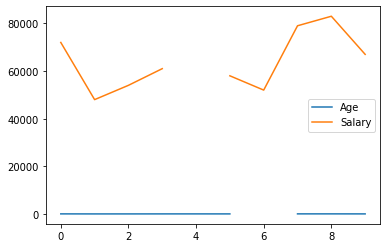

In [20]:
df.plot()
plt.show()

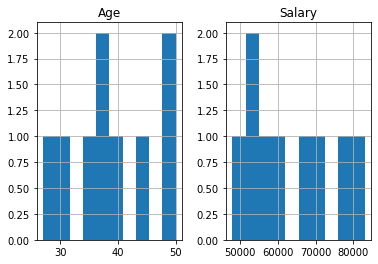

In [21]:
cdf = df[['Age' , 'Salary']]
cdf.hist()
plt.show()

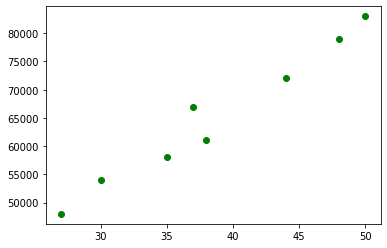

In [22]:
plt.scatter(cdf.Age , cdf.Salary , color = 'green')
plt.xlabel = ('Age')
plt.ylabel = ('Salary')
plt.show()



## Categorical data encoding

### one hot encoding (nominal)

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder' , OneHotEncoder() , [0])] , remainder='passthrough')  
features = np.array(ct.fit_transform(features))
print(features)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### ordinal encoding

In [24]:
from sklearn.preprocessing import OrdinalEncoder
dataset = {
    'degree' : ['good' , ' median' , 'bad'] ,
    'class' : ['first' ,  'second' , 'first'] ,
    ' age' : [7 , 8 , 6]   
}
dataset = pd.DataFrame(dataset)
print(dataset)
oe = OrdinalEncoder()
dataset[['degree' , 'class']] = oe.fit_transform(dataset[['degree' , 'class']])
dataset



    degree   class   age
0     good   first     7
1   median  second     8
2      bad   first     6


,degree,class,age
0,2.0,0.0,7
1,0.0,1.0,8
2,1.0,0.0,6


### label encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
le = LabelEncoder()
oe = OrdinalEncoder()
target = le.fit_transform(target)
# target = oe.fit_transform(target)
print(target)

[0 1 0 0 1 1 0 1 0 1]


## split Train and Test

explain:
in this case , we split our data into two separate part . ( train and test )
the order of define train and test variables and pass parameters is important .
we initial the train size by a float number ( between 0.0 , 1.0) or explicitly pass the integer numbers.
random state is importnt because if this parameter is empty ( null by dafault) , each time we run the cell , we see different answers .
for this reason , we equal the random state to an integer number(not important) to see just one answer each time .
stratify is very important parameter . it is divide equally the targets between train and test targets .

In [26]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(features , target , train_size = 0.8  , random_state=4 , shuffle=True  , stratify=target  ) 
print("x train \n\n" , x_train , "\n\n####################################")
print("\n x test\n\n" , x_test , "\n\n########################################")
print("\n y train\n\n " , y_train ,  "\n\n##########################################")
print("\n y_test\n\n" , y_test)

x train 

 [[1.0 0.0 0.0 35.0 58000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]] 

####################################

 x test

 [[0.0 0.0 1.0 27.0 48000.0]
 [0.0 0.0 1.0 38.0 61000.0]] 

########################################

 y train

  [1 1 0 0 1 1 0 0] 

##########################################

 y_test

 [1 0]


## Feature scaling

note : we use the feature scaling just for none dummy culomns . because the dummy culomns , already scaling in right model .
dummies : just the one hot encoder procces .

### Normalization ( Min _ Max scaling)

<img src="normalize.webp" />

Used in KNN and Neural Network

In [27]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
x_train[ :  , 3: ] = norm.fit_transform(x_train[ : , 3: ]) # note : fit and transform .
x_test [ : , 3 :] = norm.transform(x_test[ :  , 3:]) # note : just transform . not fit and transform . 
print(x_train)
print("\n#########################################\n")
print(x_test)

[[1.0 0.0 0.0 0.25 0.19354838709677424]
 [1.0 0.0 0.0 0.3500000000000001 0.4838709677419357]
 [0.0 1.0 0.0 1.0 1.0000000000000002]
 [1.0 0.0 0.0 0.7000000000000002 0.6451612903225807]
 [1.0 0.0 0.0 0.9000000000000004 0.8709677419354838]
 [0.0 1.0 0.0 0.5 0.3799283154121864]
 [0.0 1.0 0.0 0.0 0.06451612903225801]
 [0.0 0.0 1.0 0.4388888888888891 0.0]]

#########################################

[[0.0 0.0 1.0 -0.1499999999999999 -0.12903225806451624]
 [0.0 0.0 1.0 0.40000000000000013 0.29032258064516125]]


### Standardization ( Standard scaling)

Used whrer the data follows Gaussian distribution ( more use )

<img src="standardize.gif" />

In [28]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
x_train[ :  , 3:] = ssc.fit_transform(x_train[ :  , 3 :]) # note : fit and transform .
x_test[ :  , 3 :] = ssc.transform(x_test[ :  , 3:]) # note : just transform . not fit and transform . 
print(x_train)
print("\n#########################################\n")
print(x_test)

[[1.0 0.0 0.0 -0.8527910972767799 -0.7617804632935421]
 [1.0 0.0 0.0 -0.5338250764771529 0.08493264170511224]
 [0.0 1.0 0.0 1.5394540587204204 1.590200383924941]
 [1.0 0.0 0.0 0.5825559963215409 0.5553288111488084]
 [1.0 0.0 0.0 1.2204880379207947 1.213883448369983]
 [0.0 1.0 0.0 -0.05537604527771313 -0.21821155638082612]
 [0.0 1.0 0.0 -1.6502061492758466 -1.1380973988484997]
 [0.0 0.0 1.0 -0.25029972465526207 -1.326255866625978]]

#########################################

[[0.0 0.0 1.0 -2.1286551804752865 -1.7025728021809357]
 [0.0 0.0 1.0 -0.3743420660773394 -0.4795427616273244]]
